In [2]:
import csv
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
%matplotlib inline

In [3]:
col_names=['Hours', 'Requests'] 
data_web=pd.read_csv("web_traffic.tsv",delimiter='\t', names=col_names)
data_web.head()

,Hours,Requests
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [4]:
data_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
Hours       743 non-null int64
Requests    735 non-null float64
dtypes: float64(1), int64(1)
memory usage: 11.7 KB


In [5]:
data_web.fillna(data_web['Requests'].median(),inplace=True)
data_web.head()

,Hours,Requests
0,1,2272.0
1,2,1764.0
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [6]:
data_web.mean()

Hours        372.000000
Requests    1960.032301
dtype: float64

In [7]:
data_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
Hours       743 non-null int64
Requests    743 non-null float64
dtypes: float64(1), int64(1)
memory usage: 11.7 KB


In [8]:
import seaborn as sns
sns.set(style="darkgrid")

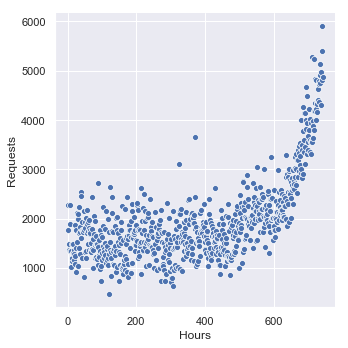

In [9]:
sns.relplot('Hours','Requests',data=data_web,kind='scatter')
plt.show()

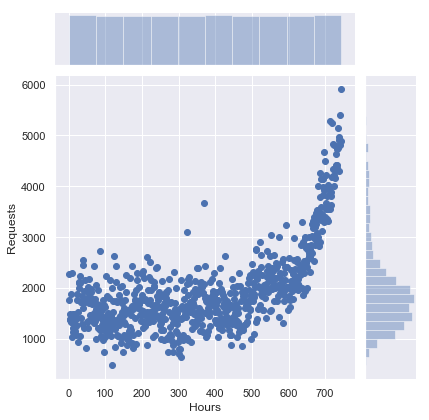

In [10]:
sns.jointplot('Hours','Requests',data=data_web,kind='scatter')
plt.show()

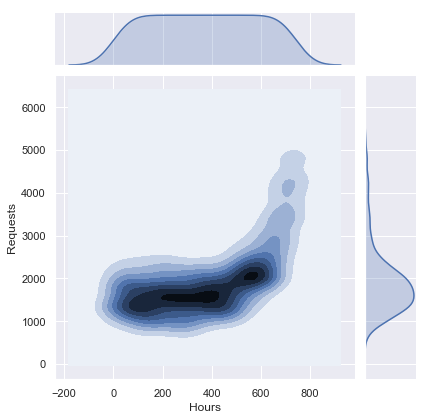

In [11]:
sns.jointplot('Hours','Requests',data=data_web,kind='kde')
plt.show()

In [12]:
import statsmodels.formula.api as smf

In [13]:
data_web.keys()

Index(['Hours', 'Requests'], dtype='object')

In [14]:
model = smf.ols(formula="Requests~Hours",data=data_web)
resultweb = model.fit()

In [15]:
print(resultweb.summary())

                            OLS Regression Results                            
Dep. Variable:               Requests   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     520.8
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           1.02e-87
Time:                        19:38:00   Log-Likelihood:                -5873.2
No. Observations:                 743   AIC:                         1.175e+04
Df Residuals:                     741   BIC:                         1.176e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1006.5236     48.230     20.869      0.0

In [16]:
data_web.cov()

,Hours,Requests
Hours,46066.000000,118076.161725
Requests,118076.161725,733271.969306


In [17]:
data_web.corr()

,Hours,Requests
Hours,1.00000,0.64245
Requests,0.64245,1.00000


In [18]:
import statsmodels.api as sm

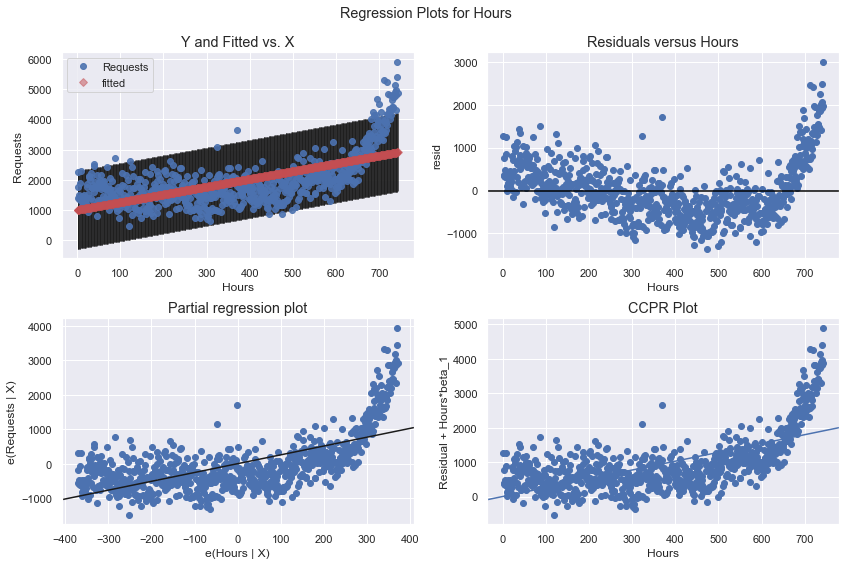

In [19]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(resultweb,'Hours',fig=fig)
# Have to joint all the red dots to draw a line

In [20]:
# Resideual Analysis
res = resultweb.resid

<Figure size 720x360 with 0 Axes>

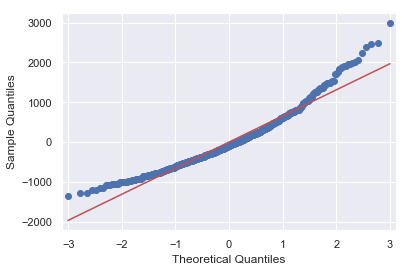

In [21]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.qqplot(res,line='s') # s : the type of line or an angle
plt.show()

In [22]:
from scipy import stats
stats.shapiro(res)

(0.9525030851364136, 9.696020875570813e-15)

In [23]:
sm.stats.diagnostic.kstest_normal(res)

(0.06862836701536512, 7.797169226927718e-09)

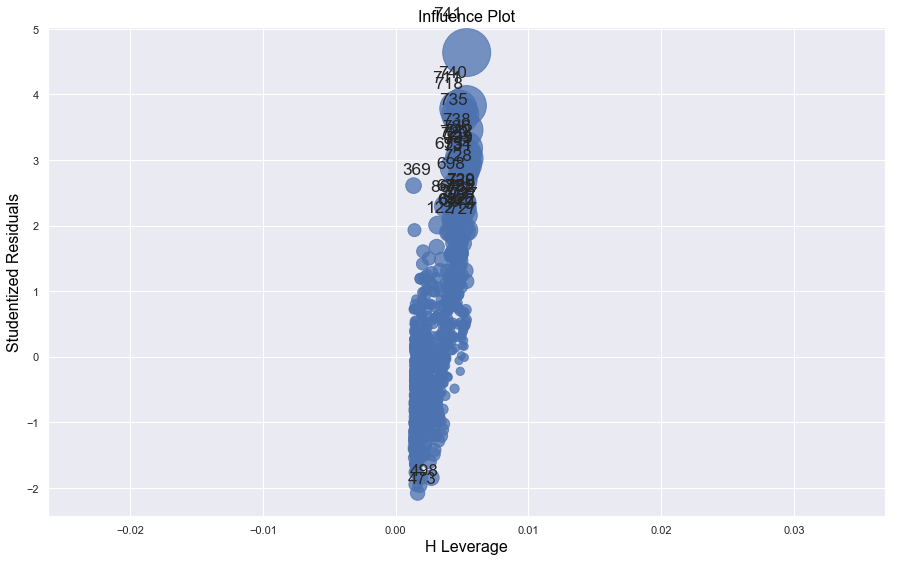

In [24]:
fig, ax = plt.subplots(figsize=(15,9))
fig = sm.graphics.influence_plot(resultweb, ax=ax, criterion="cooks")

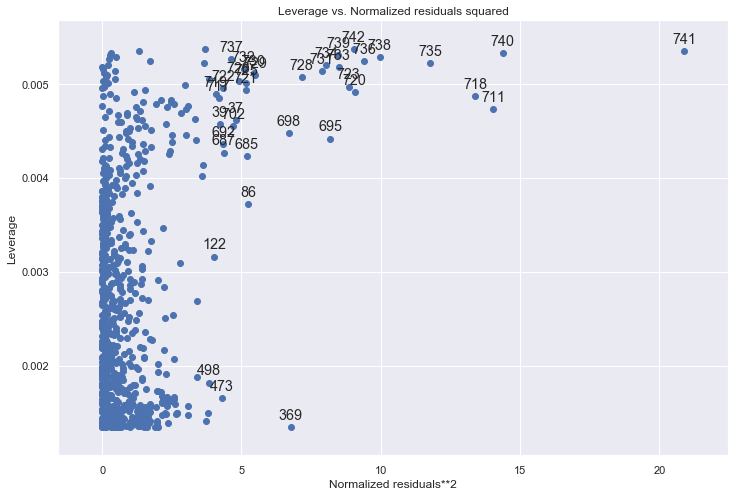

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_leverage_resid2(resultweb, ax=ax)

## Polynomial Linear Regression
> Two Degree
### $y = a + b_1*X + b_2 * X§2$

In [26]:
data_web.head()

,Hours,Requests
0,1,2272.0
1,2,1764.0
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [27]:
web2 = data_web.copy()

In [28]:
web2.head()

,Hours,Requests
0,1,2272.0
1,2,1764.0
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [29]:
web2['Hours_sq'] = web2['Hours'] ** 2;
web2.head()

,Hours,Requests,Hours_sq
0,1,2272.0,1
1,2,1764.0,4
2,3,1386.0,9
3,4,1365.0,16
4,5,1488.0,25


In [30]:
web2.keys()

Index(['Hours', 'Requests', 'Hours_sq'], dtype='object')

In [31]:
model2 = smf.ols(formula="Requests~Hours+Hours_sq",data=web2)
resultweb2 = model.fit()

In [32]:
print(resultweb2.summary())

                            OLS Regression Results                            
Dep. Variable:               Requests   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     520.8
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           1.02e-87
Time:                        19:39:48   Log-Likelihood:                -5873.2
No. Observations:                 743   AIC:                         1.175e+04
Df Residuals:                     741   BIC:                         1.176e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1006.5236     48.230     20.869      0.0

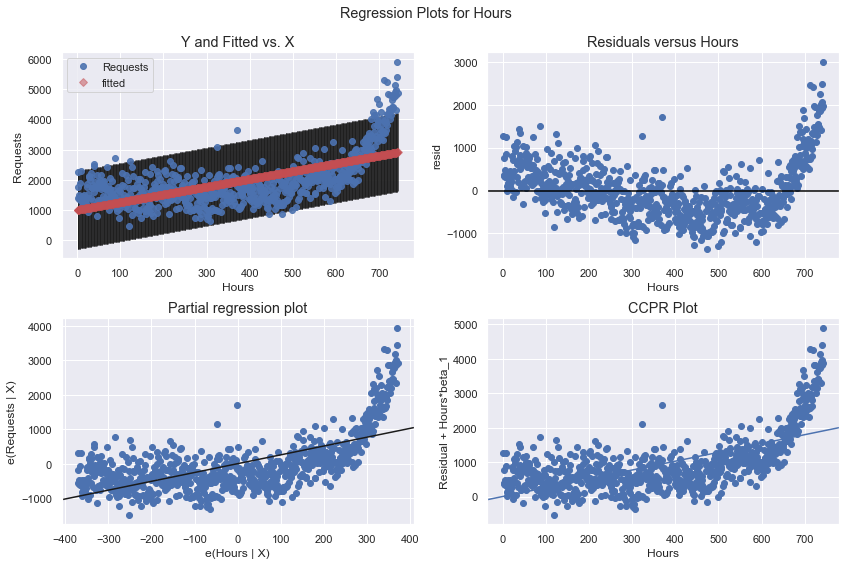

In [33]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(resultweb2,'Hours',fig=fig)
# Have to joint all the red dots to draw a line

In [34]:
# Resideual Analysis
resweb2 = resultweb2.resid

<Figure size 720x360 with 0 Axes>

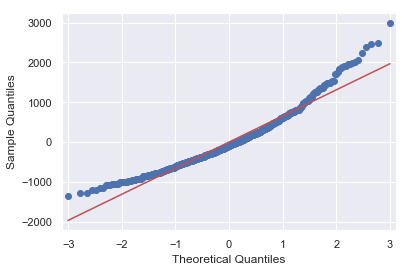

In [35]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.qqplot(resweb2,line='s') # s : the type of line or an angle
plt.show()

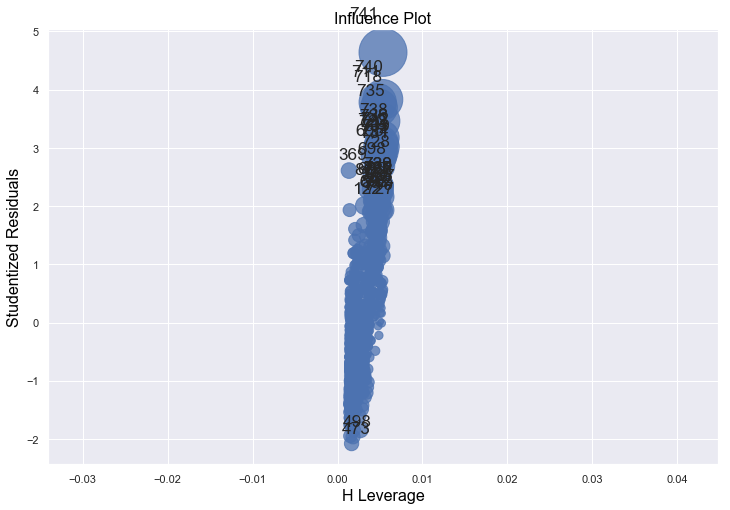

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(resultweb2, ax=ax, criterion="cooks")